In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import glob

In [23]:
exposure_model_path = '/content/drive/MyDrive/newVGG16(노출비노출).h5'
violence_model_path = '/content/drive/MyDrive/newVGG16(폭력비폭력).h5'
relationship_model_path = '/content/drive/MyDrive/newVGG16(관계비관계).h5'

In [17]:
image_size = (180, 180)
channels = 3
#본 모델에서 180, 180 3채널로 고정시켰기 때문에 고정변수입니다 이미지사이즈


In [7]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

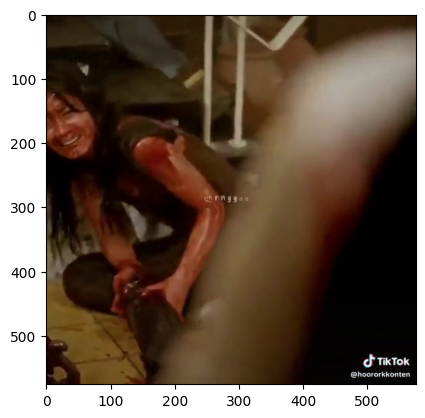

In [498]:
example_image_path = '/content/drive/MyDrive/폭력영상/폭력영상003/frame_17.jpg'
image_path = os.path.join(example_image_path)
image = load_img(image_path)
plt.imshow(image)

In [38]:
exposure_classes = ['Exposure', 'Non-Exposure'] #제가 본모델에서 넣은 순서대로 돌아가기 때문에 노출/비노출
violence_classes = ['Non-Violence', 'Violence'] # '' 비폭력/폭력
relationship_classes = ['Relationship', 'Non-Relationship'] #'' 관계/비관계


In [392]:
def preprocess_image(image):
  image = cv2.resize(image, image_size)
  image = image.astype('float32') / 255.0
  return image

In [499]:
image = cv2.imread(image_path)
preprocessed_image = preprocess_image(image)

In [390]:
exposure_model = load_model(exposure_model_path)
violence_model = load_model(violence_model_path)
relationship_model = load_model(relationship_model_path)

In [500]:
exposure_prediction = exposure_model.predict(np.expand_dims(preprocessed_image, axis=0))
print(exposure_prediction) #노출/비노출 정확도
violence_prediction = violence_model.predict(np.expand_dims(preprocessed_image, axis=0))
print(violence_prediction) #비폭력/폭력 정확도
relationship_prediction = relationship_model.predict(np.expand_dims(preprocessed_image, axis=0))
print(relationship_prediction) #관계/비관계 정확도

1/1 [==============================] - 0s 30ms/step
[[0.02909449 0.96523964]]
1/1 [==============================] - 0s 21ms/step
[[0.40792286 0.61395067]]
1/1 [==============================] - 0s 19ms/step
[[0.33743414 0.6810807 ]]


In [501]:
exposure_class_index = np.argmax(exposure_prediction)
violence_class_index = np.argmax(violence_prediction)
relationship_class_index = np.argmax(relationship_prediction)

exposure_class = exposure_classes[exposure_class_index]
violence_class = violence_classes[violence_class_index]
relationship_class = relationship_classes[relationship_class_index]

print(f"Exposure class: {exposure_class}")
print(f"Violence class: {violence_class}")
print(f"Relationship class: {relationship_class}")

Exposure class: Non-Exposure
Violence class: Violence
Relationship class: Non-Relationship


In [502]:
if exposure_class == 'Exposure' or violence_class == 'Violence' or relationship_class == 'Relationship':
    print("The image contains harmful content.")
else:
    print("The image does not contain harmful content.")
#GOOD!

The image contains harmful content.
